# Lending club Case study

### Goal:
Our aim is to identify the parameters which identify whether the loan applicant is likely to default or not

### Business Problem:

In general, we would like to understand reason behind if a Applicant is likely to be defaulted i.e. Applicant has not paid the instalments in due time for a long period of time.

### Analysis approach:
1.Data Understanding.  
2.Data Cleaning & Imputing.   
3.Univariate and Bivariate Analysis.  
4.Recommendations.

In [282]:

#importing the required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from scipy import stats
%matplotlib inline
import scipy

In [283]:
#Reading the loan data file and checking the first 5 rows in the data file
Loan_details=pd.read_csv('C:\\Users\\z003zjft\\Downloads\\casestudy\\loan\\loan.csv')
Loan_details.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


## <span style="color:Orange"> Importing data and Understanding the data </span>
<span style="color:Blue"> Checking Rows and Columns in Loan Data file</span>

In [284]:
print(Loan_details.shape)
print(Loan_details.info())


(39717, 111)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB
None



<span style="color:Blue"> *Number of rows are 39717 and number of columns are 111*</span>

In [285]:
Loan_details.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,...,0.0,0.0,0.0,0.0,39020.000000,39678.0,0.0,0.0,0.0,0.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,...,NaN,NaN,NaN,NaN,0.043260,0.0,NaN,NaN,NaN,NaN
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,...,NaN,NaN,NaN,NaN,0.204324,0.0,NaN,NaN,NaN,NaN
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
50%,6.656650e+05,8.508120e+05,10000.000000,9600.000000,8975.000000,280.220000,5.900000e+04,13.400000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
75%,8.377550e+05,1.047339e+06,15000.000000,15000.000000,14400.000000,430.780000,8.230000e+04,18.600000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
max,1.077501e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,...,NaN,NaN,NaN,NaN,2.000000,0.0,NaN,NaN,NaN,NaN


In [286]:
# Check Categorical and Numerical variables
pd.value_counts(Loan_details.dtypes)

float64    74
object     24
int64      13
dtype: int64

## <span style="color:Orange"> Data Cleaning </span>
<span style="color:blue"> Check for the empty rows </span>

In [287]:
#Start the data cleaning process before starting the analysis
#checking for the empty rows
print(Loan_details.isnull().all(axis=1).sum())

0


<span style="color:blue"> There are zero empty rows </span>

In [288]:
#checking for the empty columns
print(Loan_details.isnull().all(axis=0).sum())

54


<span style="color:blue"> There are 54 empty columns which needs to be fixed</span>

In [289]:
#Check for the empty columns
NAN_columns=Loan_details.columns[100*(Loan_details.isnull().sum()/len(Loan_details))>80]
print(NAN_columns)

Index(['mths_since_last_record', 'next_pymnt_d', 'mths_since_last_major_derog',
       'annual_inc_joint', 'dti_joint', 'verification_status_joint',
       'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m', 'open_il_6m',
       'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il',
       'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util',
       'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m',
       'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util',
       'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op',
       'mo_sin_rcnt_tl', 'mort_acc', 'mths_since_recent_bc',
       'mths_since_recent_bc_dlq', 'mths_since_recent_inq',
       'mths_since_recent_revol_delinq', 'num_accts_ever_120_pd',
       'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl',
       'num_il_tl', 'num_op_rev_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0',
       'num_sats', 'num_tl_120dpd_2m', 'num_tl_30dpd', 'num_tl_90g_dpd_24m',
 

<span style="color:blue"> Above are the columns which are having NAN values more than 80% </span>
<span style="color:blue"> so we can drop these columns since they won't add any additional values to our analysis </span>

In [290]:
#droping the columns having NA values 
Loan_details.dropna(axis=1,how='all',inplace=True)
Loan_details.shape

(39717, 57)

<span style="color:blue"> After droping the NAN columns we have 39717 rows and 57 columns</span>

In [291]:
print("Number of Duplicate id's are ", Loan_details.id.duplicated().sum())
print("Number of Duplicate member id's are ",Loan_details.member_id.duplicated().sum())

Number of Duplicate id's are  0
Number of Duplicate member id's are  0


<span style="color:blue">There are no duplicate loan applicants present</span>

In [292]:
# Check the missing values in percentage in entire dataset Loan_details 
print((Loan_details.isnull().sum()/len(Loan_details.index))*100)

id                             0.000000
member_id                      0.000000
loan_amnt                      0.000000
funded_amnt                    0.000000
funded_amnt_inv                0.000000
term                           0.000000
int_rate                       0.000000
installment                    0.000000
grade                          0.000000
sub_grade                      0.000000
emp_title                      6.191303
emp_length                     2.706650
home_ownership                 0.000000
annual_inc                     0.000000
verification_status            0.000000
issue_d                        0.000000
loan_status                    0.000000
pymnt_plan                     0.000000
url                            0.000000
desc                          32.580507
purpose                        0.000000
title                          0.027696
zip_code                       0.000000
addr_state                     0.000000
dti                            0.000000


<span style="color:Blue"> The Below customer behavior variables are not available at the time of loan application, and thus they
cannot be used as predictors for Loan approval.
So removing the below columns</span>

In [293]:

#Droping the columns which will not contribute to our analysis in finding whether the customer is default or not
Loan_details.drop(['id','member_id','pymnt_plan', 'initial_list_status','collections_12_mths_ex_med','policy_code','acc_now_delinq',
 'application_type', 'tax_liens', 'desc','mths_since_last_delinq','mths_since_last_record','open_acc','pub_rec',
'url','emp_title','zip_code','delinq_amnt','title', 'addr_state','funded_amnt','delinq_2yrs','total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries','sub_grade',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt','inq_last_6mths','revol_bal', 'revol_util', 'total_acc',
       'next_pymnt_d', 'last_credit_pull_d','out_prncp', 'out_prncp_inv','chargeoff_within_12_mths','earliest_cr_line','total_pymnt','funded_amnt_inv','installment'], axis = 1, inplace = True)

In [294]:
Loan_details.shape

(39717, 13)

<span style="color:Blue"> We have 13 columns after removing the above customer behavior columns from dataset</span>

<span style="color:Blue"> Below are the columns available for the analysis</span>

In [295]:
Loan_details.columns

Index(['loan_amnt', 'term', 'int_rate', 'grade', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'loan_status', 'purpose', 'dti', 'pub_rec_bankruptcies'],
      dtype='object')

In [296]:
#Removing % from the interest rate column
Loan_details.int_rate=Loan_details.int_rate.apply(lambda x:x.replace('%',''))

In [297]:
Loan_details.head()

,loan_amnt,term,int_rate,grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,dti,pub_rec_bankruptcies
0,5000,36 months,10.65,B,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,27.65,0.0
1,2500,60 months,15.27,C,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,1.00,0.0
2,2400,36 months,15.96,C,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,8.72,0.0
3,10000,36 months,13.49,C,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,20.00,0.0
4,3000,60 months,12.69,B,1 year,RENT,80000.0,Source Verified,Dec-11,Current,other,17.94,0.0


In [298]:
#Checking for missing values
Loan_details.isna().sum().sort_values(ascending=False)

emp_length              1075
pub_rec_bankruptcies     697
loan_amnt                  0
term                       0
int_rate                   0
grade                      0
home_ownership             0
annual_inc                 0
verification_status        0
issue_d                    0
loan_status                0
purpose                    0
dti                        0
dtype: int64

<span style="color:Blue"> There are 2 columns emp_length ,pub_rec_bankruptcies with empty values in it
Further will impute the empty values</span>

## <span style="color:Blue"> Imputing null values for each column </span>

In [299]:
#Lets go through each columns and fill the details for the empty spaces
Loan_details.emp_length.info()
Loan_details.emp_length.value_counts()

<class 'pandas.core.series.Series'>
RangeIndex: 39717 entries, 0 to 39716
Series name: emp_length
Non-Null Count  Dtype 
--------------  ----- 
38642 non-null  object
dtypes: object(1)
memory usage: 310.4+ KB


10+ years    8879
< 1 year     4583
2 years      4388
3 years      4095
4 years      3436
5 years      3282
1 year       3240
6 years      2229
7 years      1773
8 years      1479
9 years      1258
Name: emp_length, dtype: int64

<span style="color:Blue">we will substitute empty values with most frequent values since the count of employees with 10+years of experience is high compared to other</span>

In [300]:
Loan_details.emp_length.fillna(Loan_details.emp_length.mode()[0],inplace=True)

In [301]:
Loan_details.emp_length.info()
#now we have no null values after executing the above code

<class 'pandas.core.series.Series'>
RangeIndex: 39717 entries, 0 to 39716
Series name: emp_length
Non-Null Count  Dtype 
--------------  ----- 
39717 non-null  object
dtypes: object(1)
memory usage: 310.4+ KB


<span style="color:Blue"> Filling NA values in the column pub_rec_bankruptcies with mode(most frequent values) values</span>

In [302]:
Loan_details.pub_rec_bankruptcies.describe()


count    39020.000000
mean         0.043260
std          0.204324
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          2.000000
Name: pub_rec_bankruptcies, dtype: float64

In [303]:
Loan_details.pub_rec_bankruptcies.fillna(Loan_details.pub_rec_bankruptcies.mode()[0],inplace=True)

<span style="color:Blue">Replacing NONE values with the OTHER values in home_ownership column</span>

In [304]:
Loan_details['home_ownership'].unique()

array(['RENT', 'OWN', 'MORTGAGE', 'OTHER', 'NONE'], dtype=object)

In [305]:

Loan_details['home_ownership']=Loan_details['home_ownership'].apply(lambda x:x.replace('NONE','OTHER'))

## <span style="color:Blue"> Imputing datatype of each column </span>

In [306]:
Loan_details.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loan_amnt             39717 non-null  int64  
 1   term                  39717 non-null  object 
 2   int_rate              39717 non-null  object 
 3   grade                 39717 non-null  object 
 4   emp_length            39717 non-null  object 
 5   home_ownership        39717 non-null  object 
 6   annual_inc            39717 non-null  float64
 7   verification_status   39717 non-null  object 
 8   issue_d               39717 non-null  object 
 9   loan_status           39717 non-null  object 
 10  purpose               39717 non-null  object 
 11  dti                   39717 non-null  float64
 12  pub_rec_bankruptcies  39717 non-null  float64
dtypes: float64(3), int64(1), object(9)
memory usage: 3.9+ MB


<span style="color:Blue"> Converting int_rate to numeric and removing % </span>

In [307]:
Loan_details.int_rate=Loan_details.int_rate.apply(lambda x: pd.to_numeric(x.split("%")[0]))

In [308]:
Loan_details.int_rate.info()

<class 'pandas.core.series.Series'>
RangeIndex: 39717 entries, 0 to 39716
Series name: int_rate
Non-Null Count  Dtype  
--------------  -----  
39717 non-null  float64
dtypes: float64(1)
memory usage: 310.4 KB


In [309]:
(Loan_details.loan_status.value_counts()/Loan_details.shape[0])*100
#Observation:
#About 85% of customer who applied for loan are fully paid and about 15 percentage of customers are charged off

Fully Paid     82.961956
Charged Off    14.167737
Current         2.870307
Name: loan_status, dtype: float64

In [310]:
#Applicant with loan status CURRENT does not contribute anything to our analysis so removing the records having loan status as "Current"
Loan_details= Loan_details[Loan_details.loan_status!='Current']
Loan_details.shape

(38577, 13)

In [311]:
#we do not have any null values in our Loan_details dataset and we can further proceed to univariate analysis
Loan_details.isnull().sum()

loan_amnt               0
term                    0
int_rate                0
grade                   0
emp_length              0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
dti                     0
pub_rec_bankruptcies    0
dtype: int64

# <span style="color:Orange"> Univariate Analysis </span>
## <span style="color:Blue"> Removal of Outliers </span>

0.95    25000.0
0.94    25000.0
0.96    25000.0
0.97    28000.0
0.98    30000.0
0.99    35000.0
1.00    35000.0
Name: loan_amnt, dtype: float64

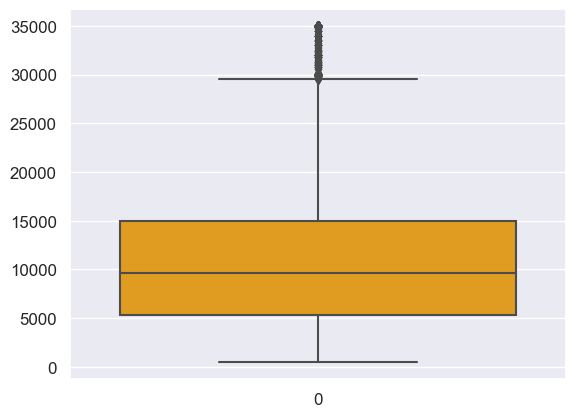

In [312]:
sns.boxplot(Loan_details.loan_amnt,color = "orange")
Loan_details.loan_amnt.quantile([0.95,0.94,0.96,0.97,0.98,0.99,1])

0.90    16.820
0.95    18.312
0.96    18.670
0.97    19.290
0.98    19.910
0.99    20.990
1.00    24.400
Name: int_rate, dtype: float64

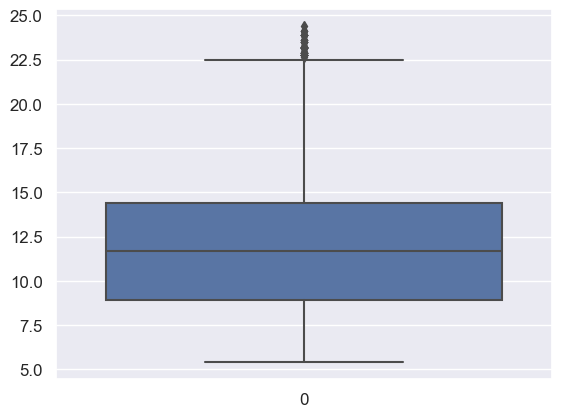

In [313]:
sns.boxplot(Loan_details.int_rate)
Loan_details.int_rate.quantile([0.90,0.95,0.96,0.97,0.98,0.99,1])

From the above 2 box plots of int_rate and loan amount we can observe that there is presence of outlier 
but since the distribution is continuous we will not be deleting the outliers

0.00      4000.0
0.90    111000.0
0.95    135000.0
0.96    140992.2
0.97    150000.0
0.98    165000.0
0.99    189000.0
1.00    234000.0
Name: annual_inc, dtype: float64

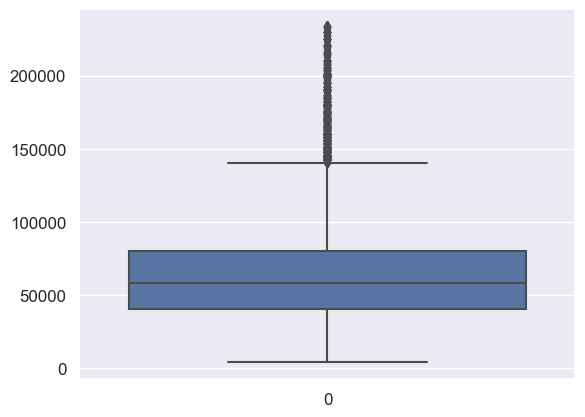

In [349]:
sns.boxplot(Loan_details.annual_inc)
Loan_details.annual_inc.quantile([0,0.90,0.95,0.96,0.97,0.98,0.99,1])
#we will delete the rows above 99 percentiles since there is lot of difference between 99 percentile to 100 percentile

In [315]:
Loan_details['grade'].value_counts()

B    11675
A    10045
C     7834
D     5085
E     2663
F      976
G      299
Name: grade, dtype: int64

In [316]:
Loan_details['home_ownership'].value_counts()

RENT        18480
MORTGAGE    17021
OWN          2975
OTHER         101
Name: home_ownership, dtype: int64

In [317]:
#Retain the records having annual income less than 99 percentile
Loan_details=Loan_details[Loan_details.annual_inc<=Loan_details.annual_inc.quantile(0.99)]

In [318]:
Loan_details.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 38191 entries, 0 to 39716
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loan_amnt             38191 non-null  int64  
 1   term                  38191 non-null  object 
 2   int_rate              38191 non-null  float64
 3   grade                 38191 non-null  object 
 4   emp_length            38191 non-null  object 
 5   home_ownership        38191 non-null  object 
 6   annual_inc            38191 non-null  float64
 7   verification_status   38191 non-null  object 
 8   issue_d               38191 non-null  object 
 9   loan_status           38191 non-null  object 
 10  purpose               38191 non-null  object 
 11  dti                   38191 non-null  float64
 12  pub_rec_bankruptcies  38191 non-null  float64
dtypes: float64(4), int64(1), object(8)
memory usage: 4.1+ MB


<Axes: xlabel='count', ylabel='purpose'>

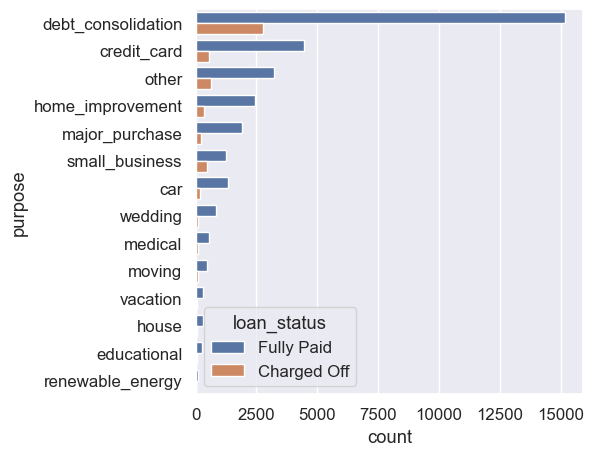

In [319]:

fig, ax = plt.subplots(figsize=(5,5))
sns.countplot(data=Loan_details, y="purpose", hue='loan_status', ax=ax,order=Loan_details['purpose'].value_counts().index, hue_order=['Fully Paid','Charged Off'])



### <span style="color:Blue">Observation::Most of the Charged off loans are taken for debt consolidaiton , credit card payment and other purpuses</span>

<Axes: xlabel='count', ylabel='emp_length'>

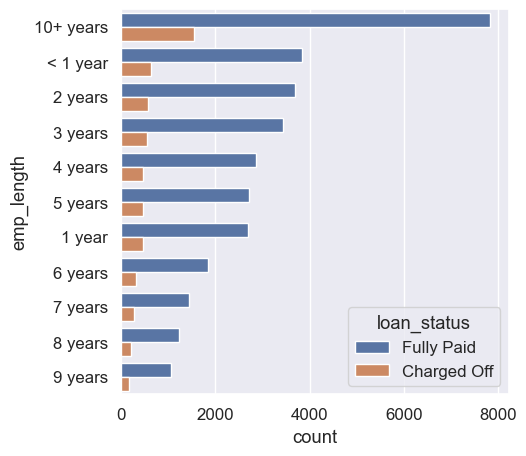

In [320]:
fig, ax = plt.subplots(figsize=(5,5))
sns.countplot(data=Loan_details, y="emp_length", hue='loan_status', ax=ax,order=Loan_details['emp_length'].value_counts().index, hue_order=['Fully Paid','Charged Off'])


### <span style="color:Blue">Observation::Most of the charged off loans are taken by the applicants who have experience more than 10 years </span>

<Axes: xlabel='count', ylabel='home_ownership'>

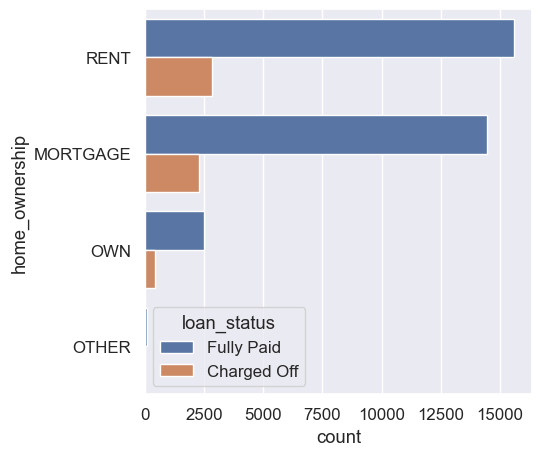

In [321]:

fig, ax = plt.subplots(figsize=(5,5))
sns.countplot(data=Loan_details, y="home_ownership", hue='loan_status', ax=ax,order=Loan_details['home_ownership'].value_counts().index, hue_order=['Fully Paid','Charged Off'])


### <span style="color:Blue">Observation::Most of the applicants who are charged off are having home ownership as rent or mortgage</span>

In [322]:
#Extract year and month from the issued date columns
Loan_details.issue_d = pd.to_datetime(Loan_details.issue_d, format='%b-%y')
Loan_details['year']=Loan_details['issue_d'].dt.year
Loan_details['month']=Loan_details['issue_d'].dt.month

(array([ 0.,  2.,  4.,  6.,  8., 10., 12., 14.]),
 [Text(0.0, 0, '0'),
  Text(2.0, 0, '2'),
  Text(4.0, 0, '4'),
  Text(6.0, 0, '6'),
  Text(8.0, 0, '8'),
  Text(10.0, 0, '10'),
  Text(12.0, 0, '12'),
  Text(14.0, 0, '14')])

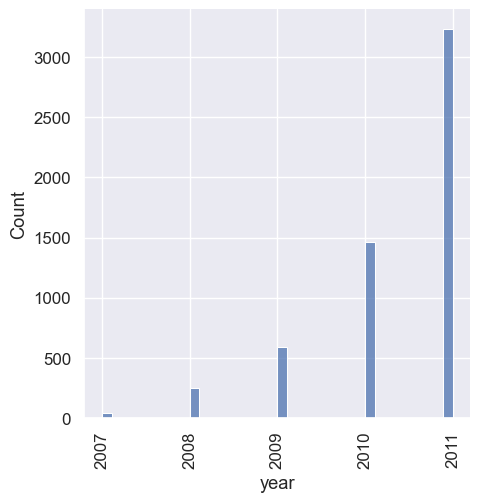

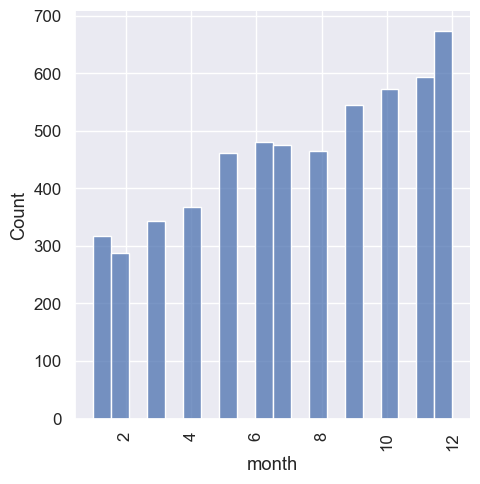

In [323]:

sns.displot(data=Loan_details[Loan_details.loan_status == 'Charged Off'], x="year")
plt.xticks(rotation=90)

sns.displot(data=Loan_details[Loan_details.loan_status == 'Charged Off'], x="month")
plt.xticks(rotation=90)



### <span style="color:Blue">Observation::Maximum number of charged off has happened when loan issued were in the month of december as well as in the year 2011</span>

<Axes: xlabel='count', ylabel='term'>

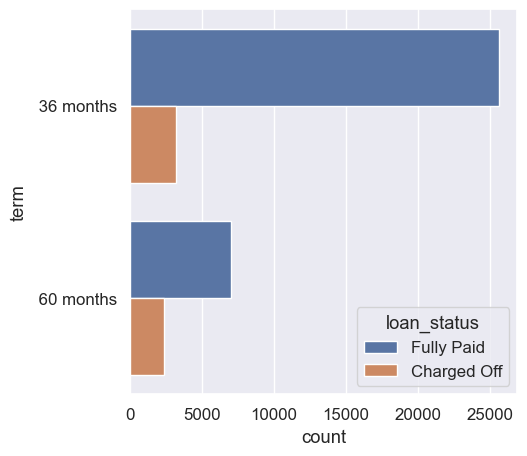

In [324]:
fig, ax = plt.subplots(figsize=(5,5))
sns.countplot(data=Loan_details, y="term", hue='loan_status', ax=ax,order=Loan_details['term'].value_counts().index, hue_order=['Fully Paid','Charged Off'])


### <span style="color:Blue">Observation::The applicants are more likely to charged off if the loan term is less</span>

<Axes: xlabel='count', ylabel='grade'>

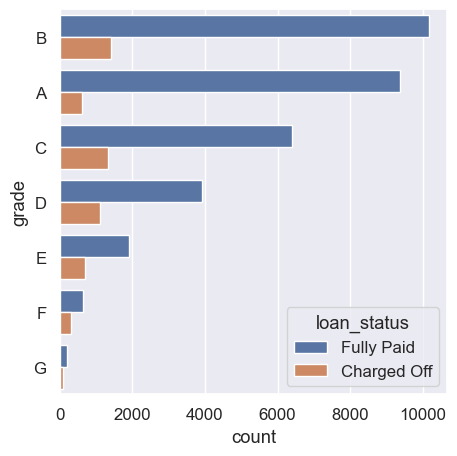

In [325]:

fig, ax = plt.subplots(figsize=(5,5))
sns.countplot(data=Loan_details, y="grade", hue='loan_status', ax=ax,order=Loan_details['grade'].value_counts().index, hue_order=['Fully Paid','Charged Off'])


### <span style="color:Blue">Observation:: The applicants with grade B are more likely to take loan</span>

<Axes: xlabel='count', ylabel='verification_status'>

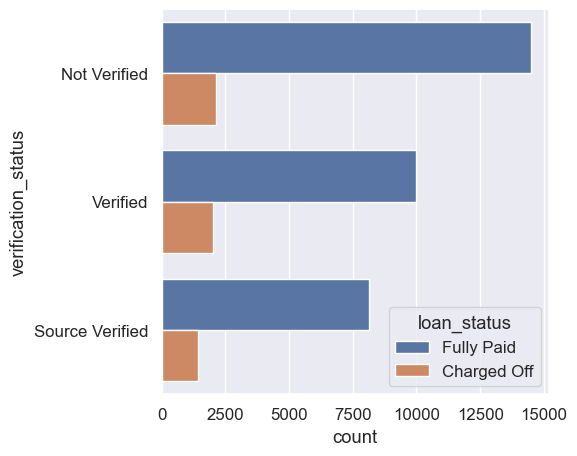

In [326]:

fig, ax = plt.subplots(figsize=(5,5))
sns.countplot(data=Loan_details, y="verification_status", hue='loan_status', ax=ax,order=Loan_details['verification_status'].value_counts().index, hue_order=['Fully Paid','Charged Off'])


### <span style="color:Blue">Observation::The applicants need to be properly verified before sanction of loan because from the above graph it is observed that the applicants are more likely to defaulter when the verification is not done</span>

<Axes: xlabel='dti_range', ylabel='count'>

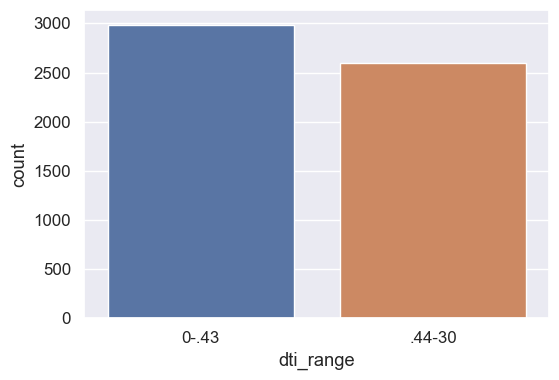

In [350]:
# Banks normally reject loan applications where DTI > .43  
# Below graph to plot the applicants who has loan status 'Charged Off'in 2 bins - 0 to .43  & greater than .43  
#Loan_details['dti_range'] = pd.cut(Loan_details['dti'], bins=6,precision =0,labels=['0-5','5-10','10-15','15-20','20-25','25-30'])
Loan_details['dti_range'] = pd.cut(Loan_details['dti'], bins=2,precision =0,labels=['0-.43','.44-30'])
fig, ax = plt.subplots(figsize = (6,4))
#ax.set_yscale('log')
sns.countplot(data=Loan_details[Loan_details.loan_status == 'Charged Off'], x="dti_range")

(array([-0.5,  0. ,  0.5,  1. ,  1.5,  2. ,  2.5]),
 [Text(-0.5, 0, '−0.5'),
  Text(0.0, 0, '0.0'),
  Text(0.5, 0, '0.5'),
  Text(1.0, 0, '1.0'),
  Text(1.5, 0, '1.5'),
  Text(2.0, 0, '2.0'),
  Text(2.5, 0, '2.5')])

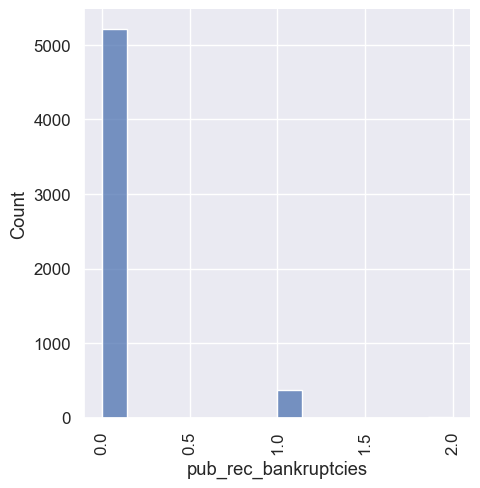

In [328]:
sns.displot(data=Loan_details[Loan_details.loan_status == 'Charged Off'], x="pub_rec_bankruptcies")
plt.xticks(rotation=90)


### <span style="color:Blue">Observation::From the above graph it is observed that the applicant with 0 Number of public record bankruptcies is more likely to charged off</span>

<Axes: xlabel='int_rate_range', ylabel='count'>

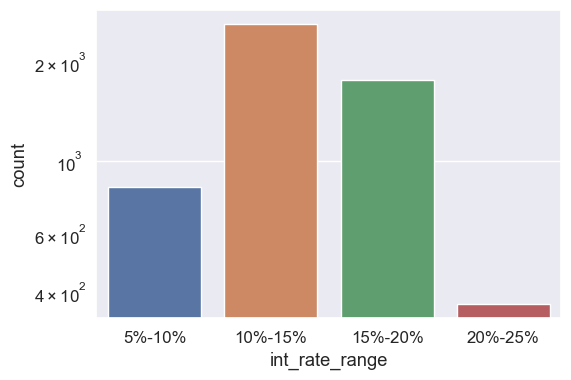

In [329]:
Loan_details['int_rate_range'] = pd.cut(Loan_details['int_rate'], bins=4,precision =0,labels=['5%-10%','10%-15%','15%-20%','20%-25%'])

fig, ax = plt.subplots(figsize = (6,4))
ax.set_yscale('log')
sns.countplot(data=Loan_details[Loan_details.loan_status == 'Charged Off'], x="int_rate_range")
# most of the Interest Rates on loans are in the range of 10% - 15%

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, '0-5k'),
  Text(1, 0, '5k-10k'),
  Text(2, 0, '10k-15k'),
  Text(3, 0, '15k-20k'),
  Text(4, 0, '20k-25k'),
  Text(5, 0, '25k-30k'),
  Text(6, 0, '30k-35k')])

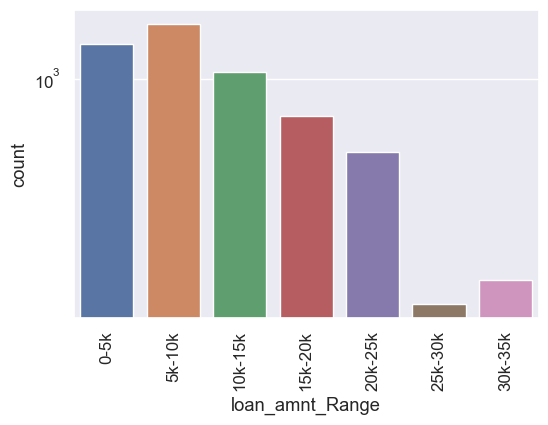

In [330]:
Loan_details['loan_amnt_Range'] = pd.cut(Loan_details['loan_amnt'], bins=7,precision =0,labels=['0-5k','5k-10k','10k-15k','15k-20k','20k-25k','25k-30k','30k-35k'])
fig, ax = plt.subplots(figsize = (6,4))
ax.set_yscale('log')
sns.countplot(data=Loan_details[Loan_details.loan_status == 'Charged Off'], x="loan_amnt_Range")
plt.xticks(rotation=90)

### <span style="color:Blue">Observation::From the above graph it is observed that the applicant with loan amount 5 to 10k are likly to become defaulter</span>

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, '0-20K'),
  Text(1, 0, '20k-40k'),
  Text(2, 0, '40k-60k'),
  Text(3, 0, '60k-80k'),
  Text(4, 0, '80k-100k'),
  Text(5, 0, '100k-120k'),
  Text(6, 0, '120k-140k'),
  Text(7, 0, '140k-160k')])

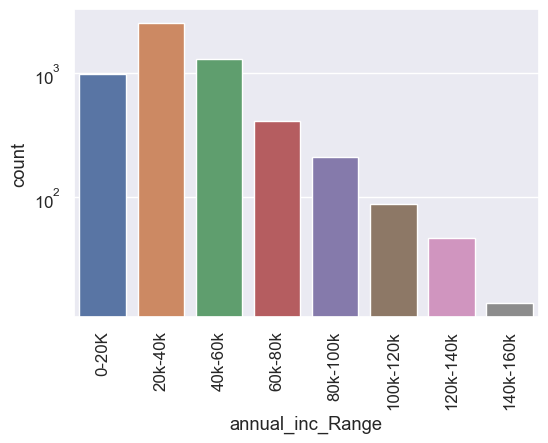

In [331]:

Loan_details['annual_inc_Range'] = pd.cut(Loan_details['annual_inc'], bins=8,precision =0,labels=['0-20K','20k-40k','40k-60k','60k-80k','80k-100k','100k-120k','120k-140k','140k-160k'])

fig, ax = plt.subplots(figsize = (6,4))
ax.set_yscale('log')
sns.countplot(data=Loan_details[Loan_details.loan_status == 'Charged Off'], x="annual_inc_Range")
plt.xticks(rotation=90)

### <span style="color:Blue">Observation::Higher the income lesser the default rate</span>

### <span style="color:Orange">Conclusion from Above analysis:
### The applicant is more likely to default when
•	Experience is more than 10 years.  
•	loans are taken for debt consolidaiton , credit card payment and other purpuses.  
•	home ownership is rent or mortgage.  
•	loan issued were in the month of december.  
•	loan term is less. 
•	verification of applicants is not done.    
•	applicant with 0 derogatory public records.  
•	Interest Rates on loans are in the range of 10% - 15%.  
•	dti range 10 to 20.  
•	applicant with 0 Number of public record bankruptcies.  
•	applicant with loan amount 5 to 10k are likly to become defaulter.  
•	Income is less.  
</span>

### <span style="color:Orange">Lets start Bivariate Analysis</span>

In [332]:
Loan_details.columns

Index(['loan_amnt', 'term', 'int_rate', 'grade', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'loan_status', 'purpose', 'dti', 'pub_rec_bankruptcies', 'year',
       'month', 'dti_range', 'int_rate_range', 'loan_amnt_Range',
       'annual_inc_Range'],
      dtype='object')

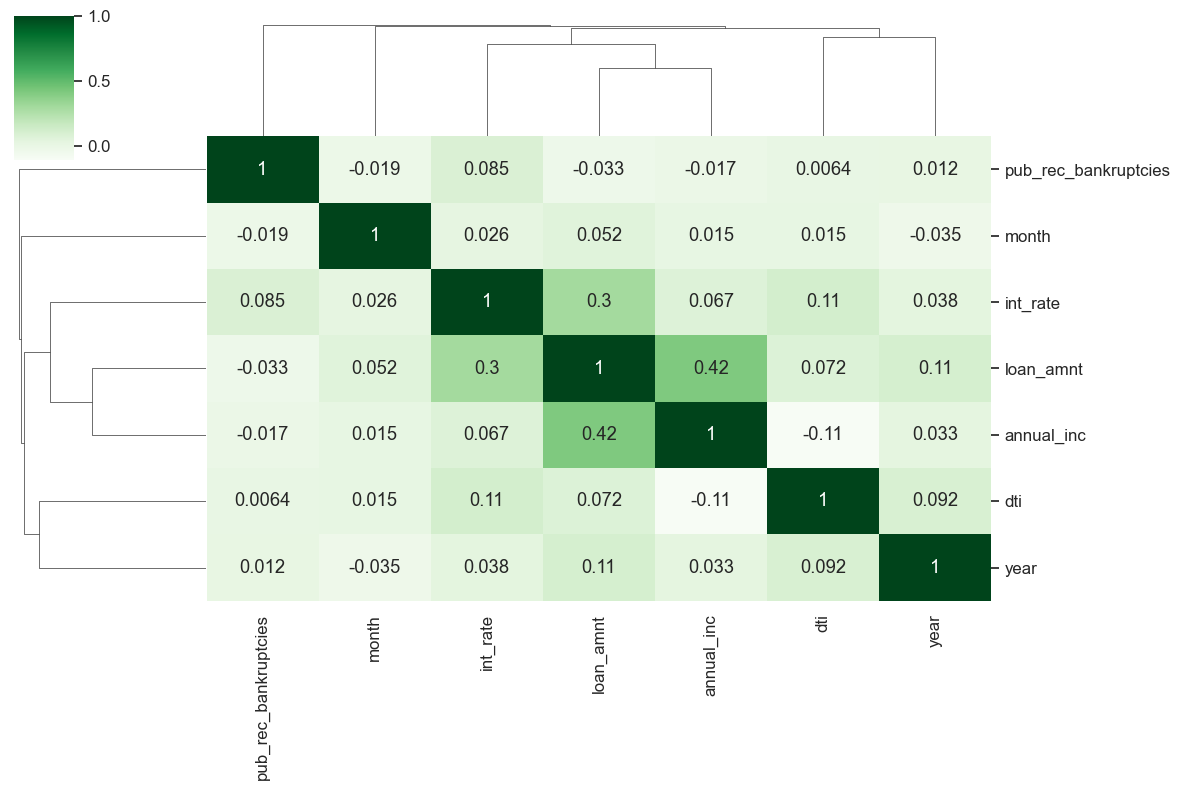

In [333]:
loan_correlation = Loan_details.corr()
sns.set(font_scale=1.1)
sns.clustermap(loan_correlation,annot=True,figsize=(12, 8),cmap="Greens")
plt.show()


### <span style="color:Blue">Observation::Anual income is negatively co-related with dti that is increse inannual income there is decrease in dti </span>

In [334]:
Loan_details.columns

Index(['loan_amnt', 'term', 'int_rate', 'grade', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'loan_status', 'purpose', 'dti', 'pub_rec_bankruptcies', 'year',
       'month', 'dti_range', 'int_rate_range', 'loan_amnt_Range',
       'annual_inc_Range'],
      dtype='object')

In [335]:
def Bivariate_Analysis (*, data=Loan_details, x, y):
    plt.figure(figsize=(10,10))
    plt.subplot(221)
    ax = sns.barplot(y=y, x=x, data =data, hue ='loan_status',palette='gist_rainbow')
    plt.xticks(rotation=90)
    plt.show()
    

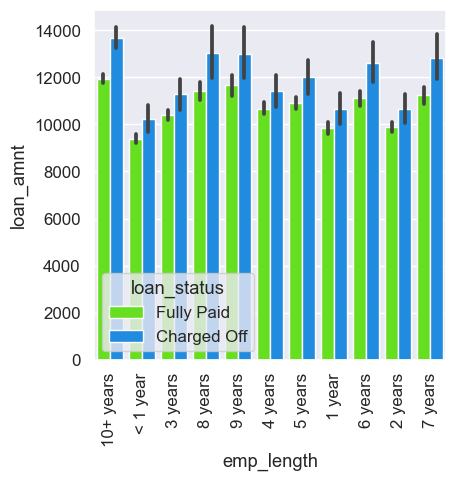

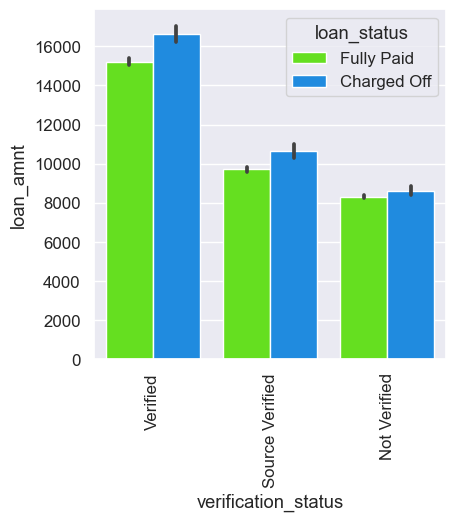

In [336]:
Bivariate_Analysis(x='emp_length', y='loan_amnt')
Bivariate_Analysis(x='verification_status', y='loan_amnt')

### <span style="color:Blue">Observation::  
 <span style="color:Blue">  1.Employees with higher experience got the loan approval for a higher amount.  
  <span style="color:Blue"> 2.Not verified loan applicants are tend to have less loan amount.</span>

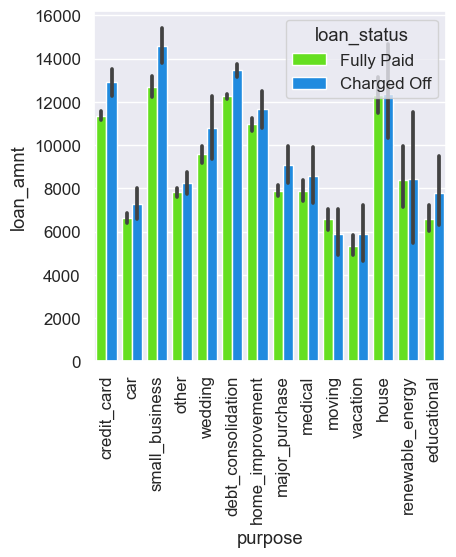

In [337]:
Bivariate_Analysis(x='purpose', y='loan_amnt')

### <span style="color:Blue">Observation::
 <span style="color:Blue">   1.Loan taken for small business purpose, Debt consolidation and Credit card are evenly  distributed as compare to the loan taken for other purposes.  
<span style="color:Blue">   2.The applicant become defaulter if he has taken high loan for small business </span>

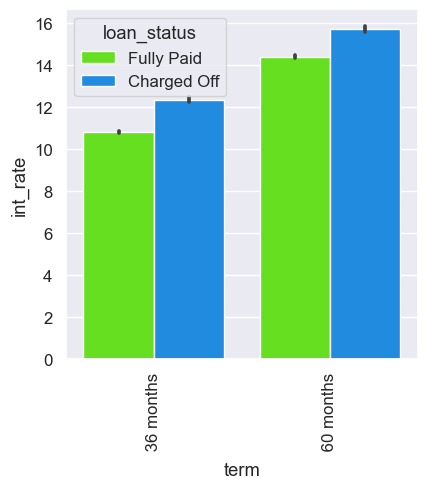

In [338]:
Bivariate_Analysis(x='term', y='int_rate')

### <span style="color:Blue"> Observation::
 <span style="color:Blue">   Higher the term of loan ,higher will be interest rate</span>

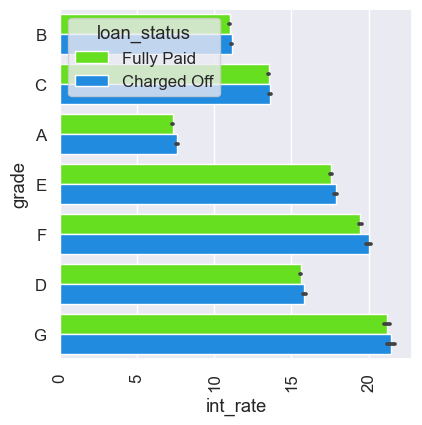

In [339]:
Bivariate_Analysis(x='int_rate', y='grade')


### <span style="color:Blue">Observation::
  <span style="color:Blue">   Interest rate increases for low grade applicants and charged off percentage is high for the grade E,F,G</span>

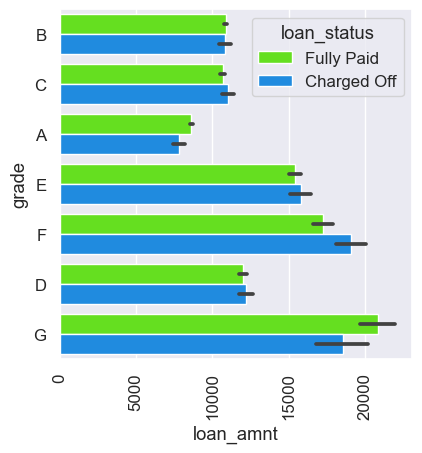

In [340]:
Bivariate_Analysis(x='loan_amnt', y='grade')
#F grade loan amount high ad charged off

### <span style="color:Blue">Observation::
  <span style="color:Blue">  Loan amount increases for low grade applicants and charged off percentage is high for the grade F</span>

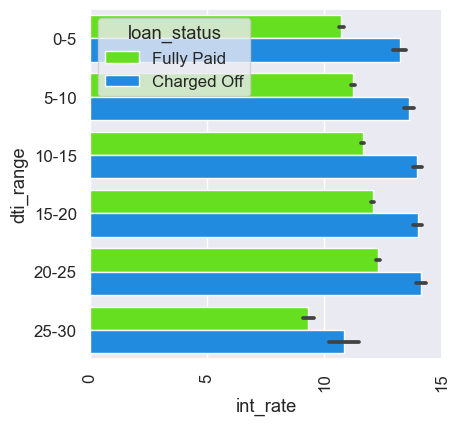

In [341]:
Bivariate_Analysis(x='int_rate', y='dti_range')


### <span style="color:Blue">Observation::
 <span style="color:Blue">No significant changes in the below plot w r t dti and interest rate but there is slight increase in the interest rate for increase in the dti also charge off rate is high for less dti range</span>

<Axes: xlabel='year', ylabel='loan_amnt'>

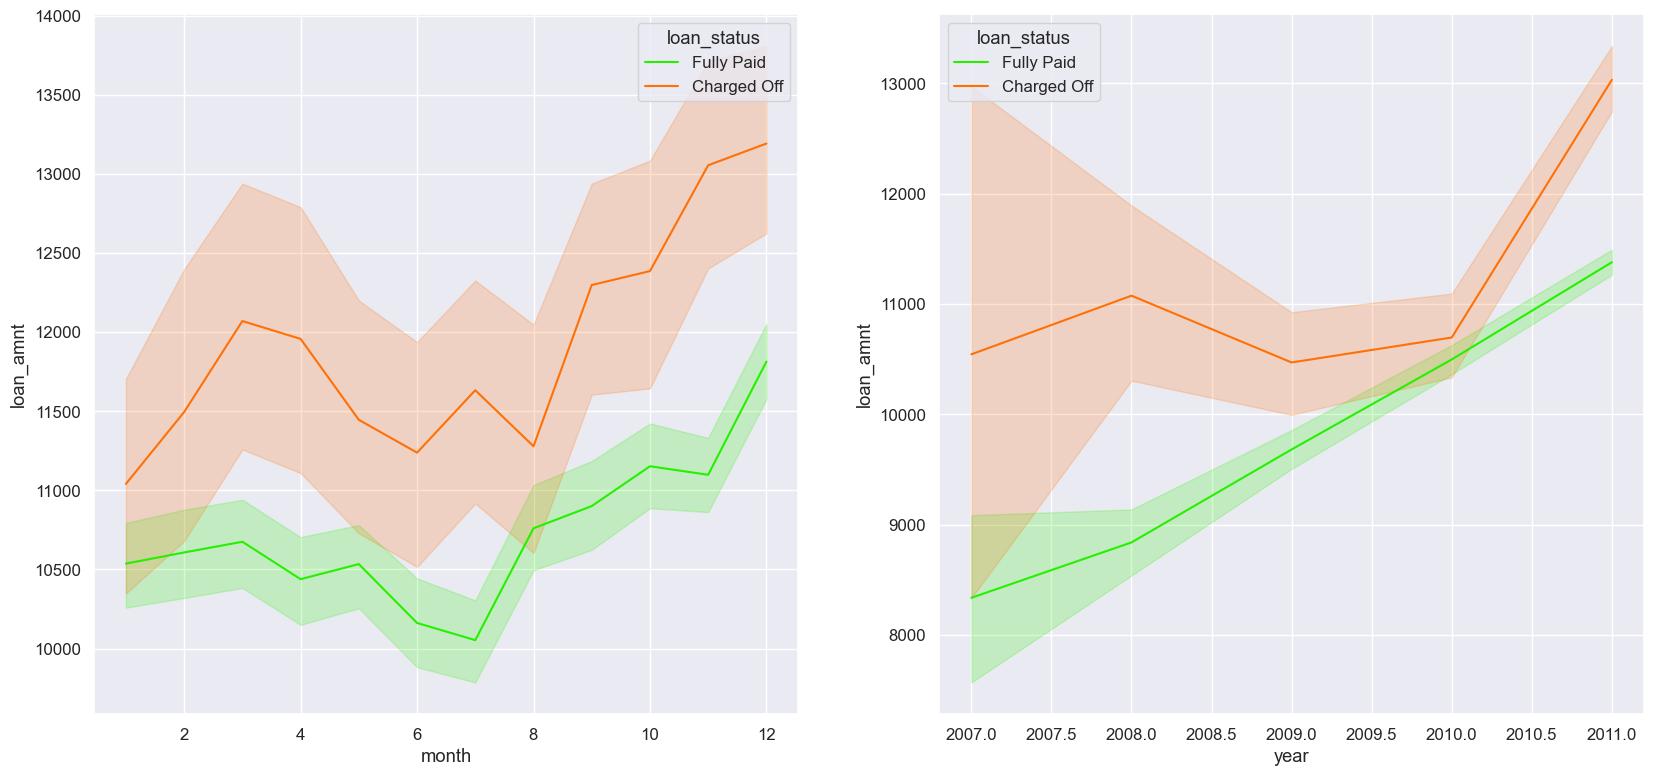

In [342]:
plt.figure(figsize=(20,20))
plt.subplot(221)
sns.lineplot(data =Loan_details,y='loan_amnt', x='month', hue ='loan_status',palette="gist_ncar")
plt.subplot(222)
sns.lineplot(data =Loan_details,y='loan_amnt', x='year', hue ='loan_status',palette="gist_ncar")


### <span style="color:Blue">Observation::
 <span style="color:Blue">Loan amount and charged off percentage increase as the years increases</span>

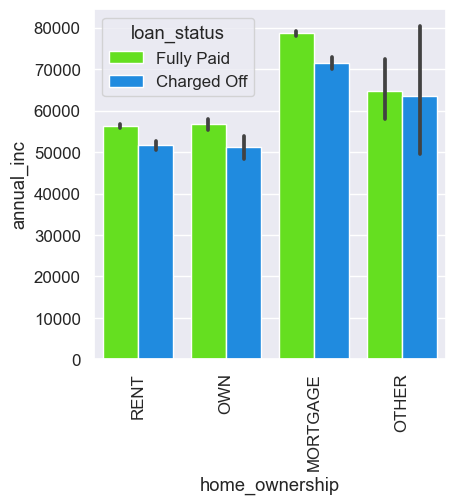

In [343]:
Bivariate_Analysis(x='home_ownership', y='annual_inc')

### <span style="color:Blue">Observation::
 <span style="color:Blue">charged off is high for the applicants who's home ownership is mortgage and who are having high annual income</span>

([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, '0-20K'),
  Text(1, 0, '20k-40k'),
  Text(2, 0, '40k-60k'),
  Text(3, 0, '60k-80k'),
  Text(4, 0, '80k-100k'),
  Text(5, 0, '100k-120k'),
  Text(6, 0, '120k-140k'),
  Text(7, 0, '140k-160k')])

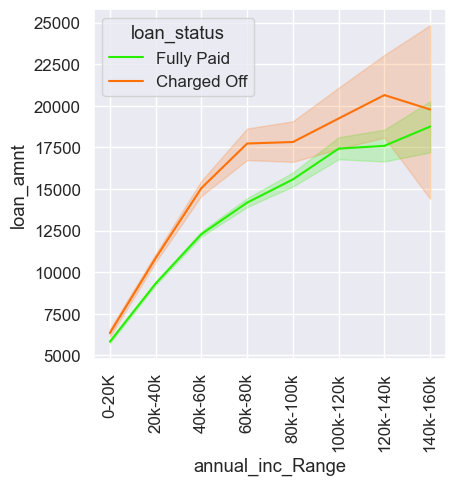

In [344]:
plt.figure(figsize=(10,10))
plt.subplot(221)
sns.lineplot(data =Loan_details,y='loan_amnt', x='annual_inc_Range', hue ='loan_status',palette="gist_ncar")
plt.xticks(rotation=90)

### <span style="color:Blue">Observation::
 <span style="color:Blue">Higher the anual income,higher will be the loan amount sanctioned and less charged off</span>

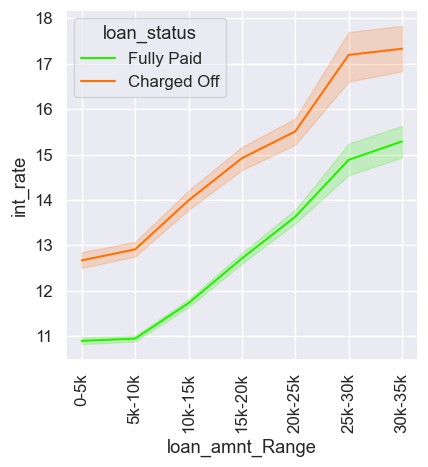

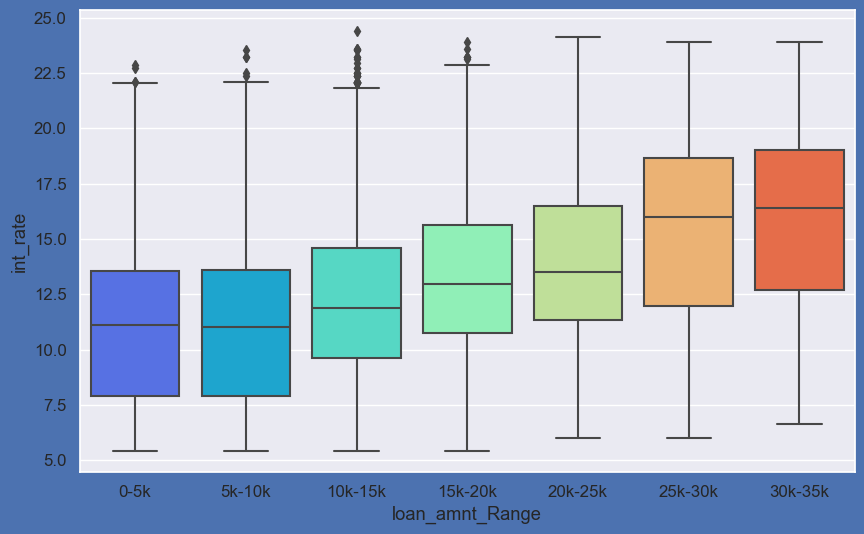

In [345]:
plt.figure(figsize=(10,10))
plt.subplot(221)
sns.lineplot(data =Loan_details,y='int_rate', x='loan_amnt_Range', hue ='loan_status',palette="gist_ncar")
plt.xticks(rotation=90)


plt.figure(figsize=(10,6),facecolor='b')
ax = sns.boxplot(y='int_rate', x='loan_amnt_Range', data =Loan_details,palette='rainbow')
plt.show()

### <span style="color:Blue">Observation::
 <span style="color:Blue">Higher the loan amount, higher will be the interest rate and default rate</span>

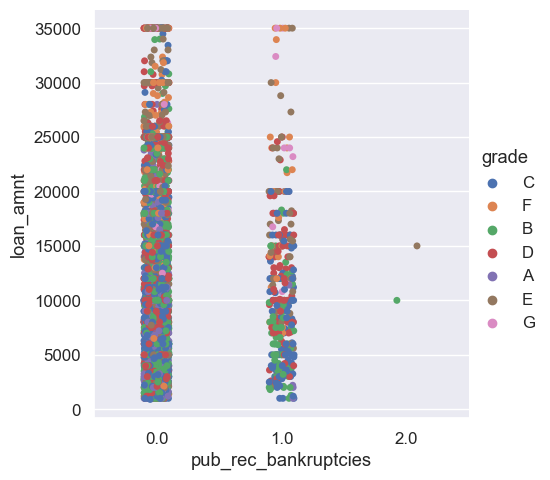

In [347]:
# Cat Plot with Loan Amount , Public Bankrupcies , Grade for applicants with loan status = Charged off
sns.catplot(x='pub_rec_bankruptcies', y='loan_amnt' ,data = Loan_details[(Loan_details.loan_status == 'Charged Off')], hue='grade');
## Observation : Applicants in higher grades - E , F , G  , with higher loan amount & have declared public bankrupcies 
## can be possible defaulters 

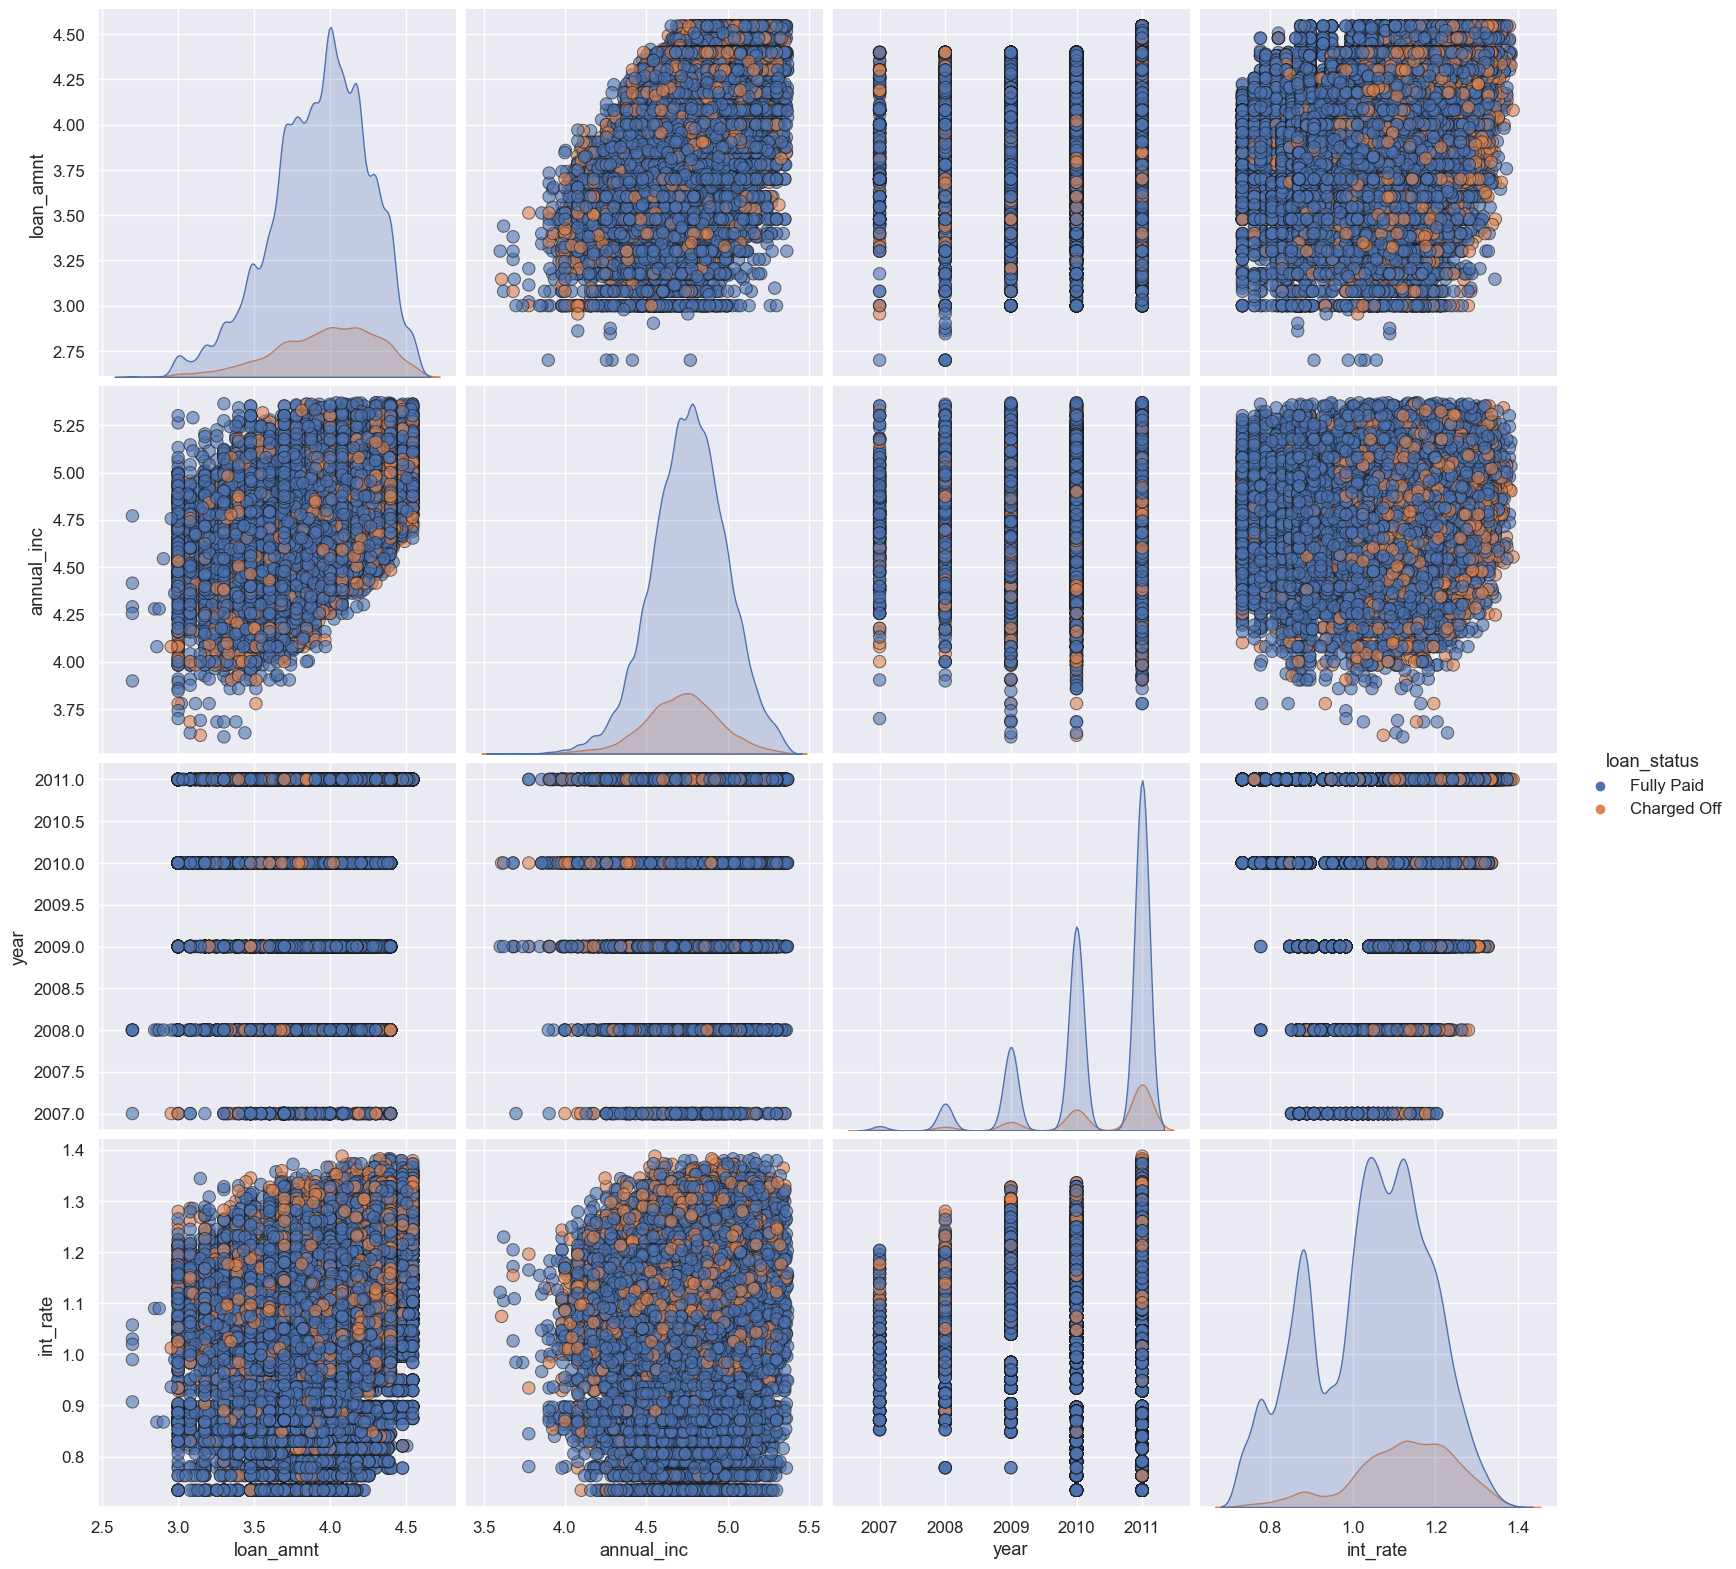

In [346]:
loan_pair = Loan_details[['loan_amnt', 'annual_inc', 'year','int_rate','loan_status']].copy()
loan_pair.head()

# Take the log of below variables as they are heavily skewed
loan_pair['loan_amnt'] = np.log10(loan_pair['loan_amnt'])
loan_pair['annual_inc'] = np.log10(loan_pair['annual_inc'])
loan_pair['int_rate'] = np.log10(loan_pair['int_rate'])

# Create a pair plot colored by loan status with a density plot of the # diagonal and format the scatter plots.
sns.pairplot(loan_pair, hue = 'loan_status', diag_kind = 'kde',
             plot_kws = {'alpha': 0.6, 's': 80, 'edgecolor': 'k'},
             size = 4)
plt.show()

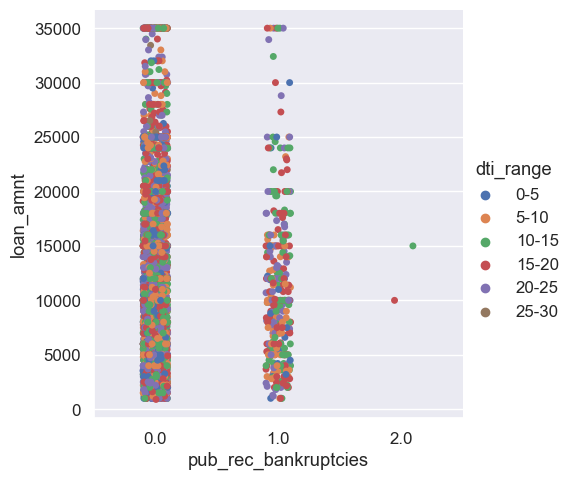

In [348]:
# Cat Plot with Loan Amount , Public Bankrupcies , Grade for applicants with loan status = Charged off
sns.catplot(x='pub_rec_bankruptcies', y='loan_amnt' ,data = Loan_details[(Loan_details.loan_status == 'Charged Off')], hue='dti_range');
## Observation : Applicants with DTI range > .43 who have applied for higher bank loan & have declared bankrupcy 
## can be possible defaulters  , Also high  charged off applicants with higher loan value and are in a range of DRI > .43 can be defaulter 

### <span style="color:Orange">Outcome of above analysis </span>

 <span style="color:Blue">  Probability of applicant become defaulters when  
 <span style="color:Blue">  1.Applicant apllied for higher loan amount having higher work experience .  
 <span style="color:Blue">  2.Applicants are verified and loan amount is 16K.  
 <span style="color:Blue">  3.Loan taken for small business purpose, Debt consolidation and Credit card and loan amount is greater than 12K.  
 <span style="color:Blue">  4.small business applicant applied for high amount of loan.  
 <span style="color:Blue">  5.Interest rate more than 15% and  grade is E/F/G.  
 <span style="color:Blue">  6.Loan amount more than 15K and grade is E/F/G.  
 <span style="color:Blue">  7.interest rate more than 15% and loan amount 25K to 35K.  
 <span style="color:Blue">  8.Loan amount is given at the end of the years.  
 <span style="color:Blue">  9.Home ownership is mortgage and annual income more than 70K.  


## <span style="color:Orange">Recomandations </span>

## <span style="color:Blue">  Financial company need to consider the following driving parameters before sanctioning the loan.  
 <span style="color:Blue">  1.Applicant with grade E,F,G are less likely to repay the loan.  
 <span style="color:Blue">  2.Verification of applicant should be done before approving the loan.  
 <span style="color:Blue">  3.Higher loan amount and hight interest rate for small business group will put the financial companyat risk.  
 <span style="color:Blue">  4.Applicant who are in  Mortgage and Rent home are not likely to replay the loan.  
 <span style="color:Blue">  5.Applicant with less loan term is likely to become defaulter.  
 <span style="color:Blue">  6.Applicants with DTI range > .43 who have applied for higher bank loan & have declared bankruptcy can be possible defaulters  , Also high  charged off applicants with higher loan value and are in a range of DRI > .43 can be defaulter .  
</span>
 <span style="color:Blue">  7.Applicant with higher employment length are seen to apply for bigger loan amounts.  
     <span style="color:Blue">  8.Applicants are less likely to repay the loan if the loan is sanctioned in the month of December.  
